Clustering is an unsupervised learning task in data mining. It aims to group a set of data points in such a way that those in the same group are more similar to each other than to those in other groups. These groups are unlabeled and are called clusters. The goal of clustering is to minimize the distances between the data points within the cluster and maximize the distances between the clusters. There are several functions available in R to perform different kinds of clustering. This recipe will explain some of these functions.

聚类是数据挖掘中的一项无监督学习任务。它的目的是对一组数据点进行分组，使同一组数据点之间的相似性大于其他组数据点之间的相似性。这些组没有标记，称为集群。聚类的目标是最小化聚类内数据点之间的距离，最大化聚类之间的距离。R中有几个函数可以执行不同类型的集群。本教程将解释其中一些功能。

To perform clustering, we need our dataset to be clustered. We also need to decide the number of groups that we intend to organize our clusters into while using some of the clustering methods. The required R-packages will be introduced when needed. As a dataset, we use the yeast data on protein localization sites in gram-negative bacteria available from the book's web page (yeast.rda). The data has been selected for four localizations and 1299 instances. It has been filtered from the original data at http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/. We have four localizations in the data, namely mitochondria, cytosol, nucleus, and membrane. To find out more about the features used, visit the UCI machine learning repository at http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.names.

要执行集群，我们需要对数据集进行集群。我们还需要在使用一些集群方法时决定要将集群组织成的组的数量。必要时将引入所需的r包。作为一个数据集，我们使用酵母在革兰氏阴性菌蛋白定位位点的数据，可从本书的网页(酵母。rda)获得。已经为4个本地化和1299个实例选择了数据。它是从http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/ 的原始数据中过滤出来的。我们在数据中有四种定位，即线粒体、细胞质、细胞核和细胞膜。要了解使用的特性的更多信息，请访问UCI机器学习存储库http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.names 。

1. First, you need a dataset as the input for clustering. Use the yeast data, which was described earlier, and select the feature columns 2 to 10 (10th column is the class label) as follows：

  首先，需要一个数据集作为集群的输入。使用前面描述的酵母数据，并选择特性列2到10(第10列是类标签)，如下所示：

In [4]:
yeast= read.table("yeast.txt",header=TRUE, sep="\t")
head(yeast)
myData <- yeast[,2:9]

name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT


2. Next, define the number of clusters you want for your dataset as follows (here, choose 4 because there are four localizations in the data):

  定义聚类数量：

In [5]:
k <- 4

3. Start with k-means clustering. To perform k-means clustering, use the following function, taking the data and the number of clusters as input:

 从k-means集群开始。若要执行k-means聚类，请使用以下函数，将数据和集群数量作为输入：

In [8]:
kmeans_result <- kmeans(myData, k)
kmeans_result

K-means clustering with 4 clusters of sizes 143, 828, 237, 276

Cluster means:
        mcg       gvh       alm       mit       erl         pox       vac
1 0.4336364 0.4429371 0.5090909 0.2283916 0.5034965 0.000000000 0.5026573
2 0.4438406 0.4548188 0.5060749 0.1978986 0.5030193 0.008224638 0.4993478
3 0.5049367 0.5041772 0.5291561 0.5022785 0.5042194 0.007721519 0.4872996
4 0.6992754 0.6611594 0.4522101 0.2610145 0.5108696 0.009021739 0.5108696
        nuc
1 0.5329371
2 0.2490338
3 0.2467511
4 0.2499638

Clustering vector:
   [1] 4 2 4 2 3 2 3 2 3 2 2 2 2 3 4 2 2 2 2 4 2 2 4 2 2 3 2 2 4 4 2 3 1 3 4 4 4
  [38] 2 3 3 4 4 4 2 2 3 4 2 4 2 2 1 3 2 4 4 4 2 2 3 3 2 1 2 2 2 2 2 2 4 2 2 3 3
  [75] 2 3 3 3 3 3 3 3 3 3 4 2 2 4 2 3 3 2 2 1 2 2 4 4 4 4 2 2 3 1 2 2 2 2 4 2 3
 [112] 2 1 3 1 3 3 3 2 2 4 3 4 3 4 4 2 3 2 3 2 2 2 3 2 2 1 2 2 2 2 3 4 2 2 1 2 2
 [149] 1 2 2 1 1 2 2 2 2 3 2 4 2 2 2 1 2 2 2 2 1 1 2 2 2 2 3 2 2 2 2 3 2 2 2 3 2
 [186] 2 2 2 2 2 4 4 2 3 3 3 3 4 4 2 3 2 3 3 4 4 3 3 3 3 3 3 4 2 2

4. Now, check the number of proteins under each cluster by looking for and clustering the results as a table, as follows:

 通过查找并将结果聚类成表，检查每个簇下的蛋白数量：

In [9]:
table(kmeans_result$cluster)


  1   2   3   4 
143 828 237 276 

5. Visualize the clusters along two selected variables of the dataset (here, the sepal length and width) as follows:

 沿着数据集的两个选定变量(这里是长度和宽度)可视化集群：

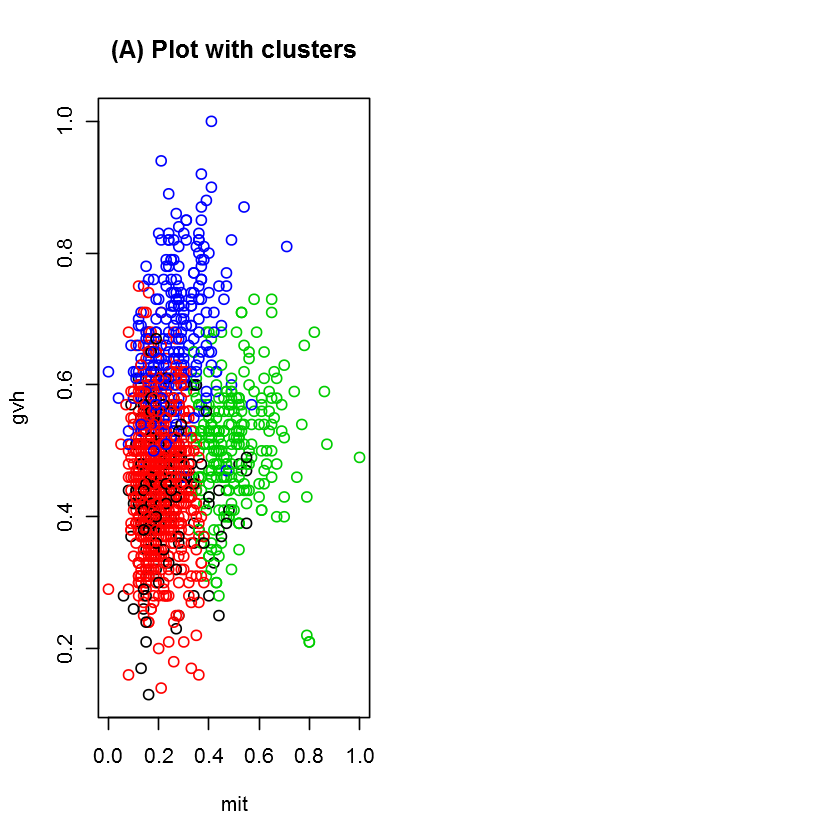

In [10]:
par(mfrow=c(1,2))
plot(myData[c("mit", "gvh")], col = kmeans_result$cluster, main = "(A) Plot with clusters")

6. Plot the actual species and compare the clustering results with actual data by typing the following command:

 绘制实际物种，并将聚类结果与实际数据进行比较：

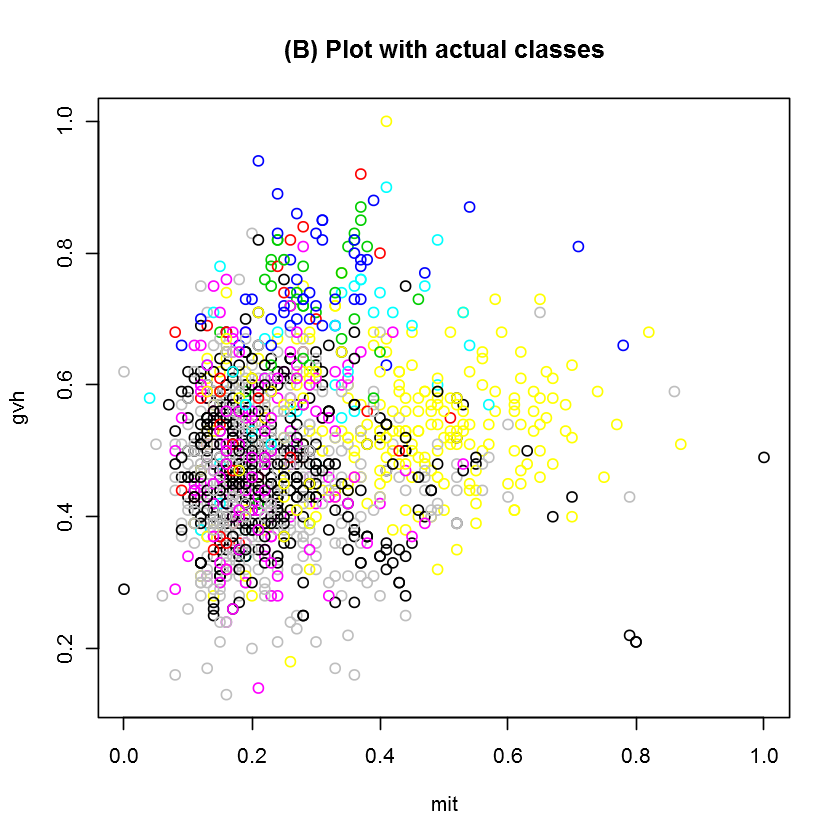

In [17]:
plot(myData[c("mit", "gvh")], col = yeast$class, main = "(B) Plot with actual classes")

7. To observe the cluster centers in the plot, add them using the following command:

 观察图中的集群中心

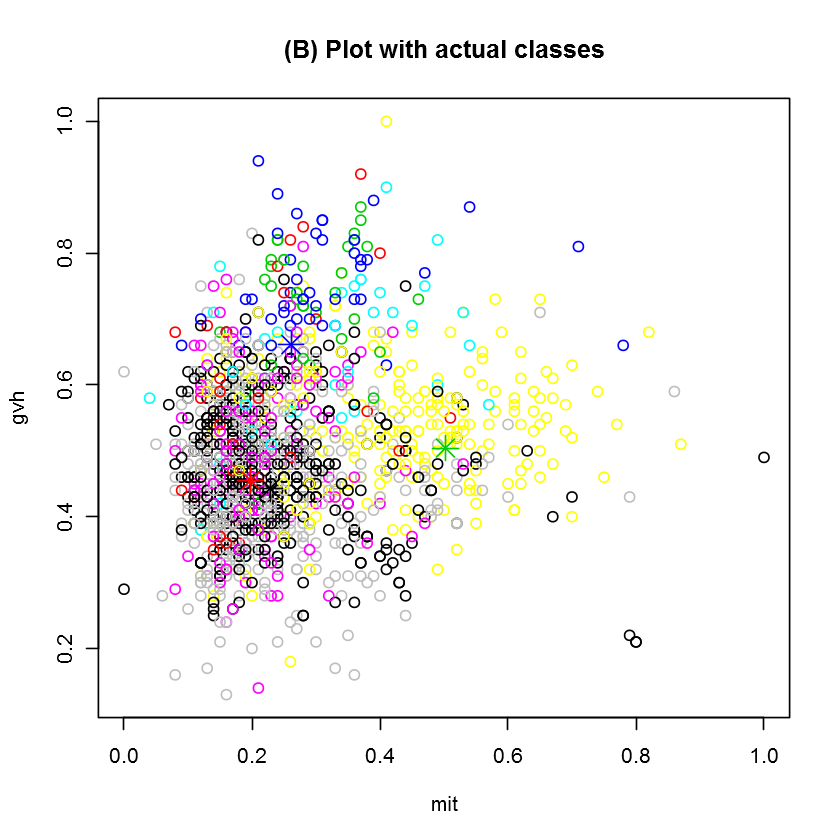

In [18]:
plot(myData[c("mit", "gvh")], col = yeast$class, main = "(B) Plot with actual classes")
points(kmeans_result$centers[,c("mit", "gvh")], col = 1:4, pch = 8, cex=2)

8. The next step is to work with hierarchical clustering. For this, first create a distance matrix between the data points. However, for visualization purposes, reduce the dataset to 100 instances (the data is provided separately under the name yeast100.rda). This can be done as follows:

 下一步是使用层次聚类。为此，首先创建数据点之间的距离矩阵。但是，出于可视化目的，请将数据集减少到100个实例(数据分别以yeast100.txt的名称提供)。可以这样做:

In [19]:
yeast100= read.table("yeast100.txt",header=TRUE, sep="\t")
myData_100 <- yeast[,2:9]
myDist <- dist(myData_100)

9. The following command is used for hierarchical clustering:

 分层集群:

In [20]:
hc <- hclust(myDist, method="ave")

10. Now, check the clusters formed by typing the following command and cut the tree for three clusters:

 检查集群，并为三个集群切割tree:

In [21]:
groups <- cutree(hc, k=k)

11. The tree thus formed can be plotted as a dendrogram, as follows:
 
 形成的树可以绘制成树木图：

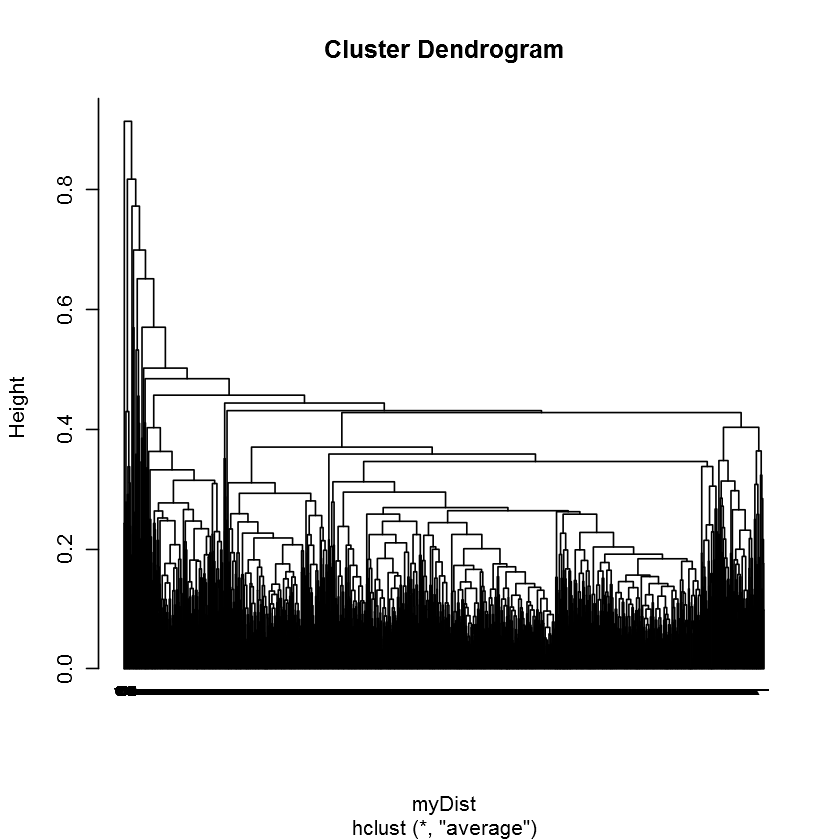

In [22]:
plot(hc, hang <- -1, labels=groups)

12. For better visualization, plot a rectangle around the cluster with the following function:
 
 为了更好地显示，可以使用以下函数在集群周围绘制一个矩形：

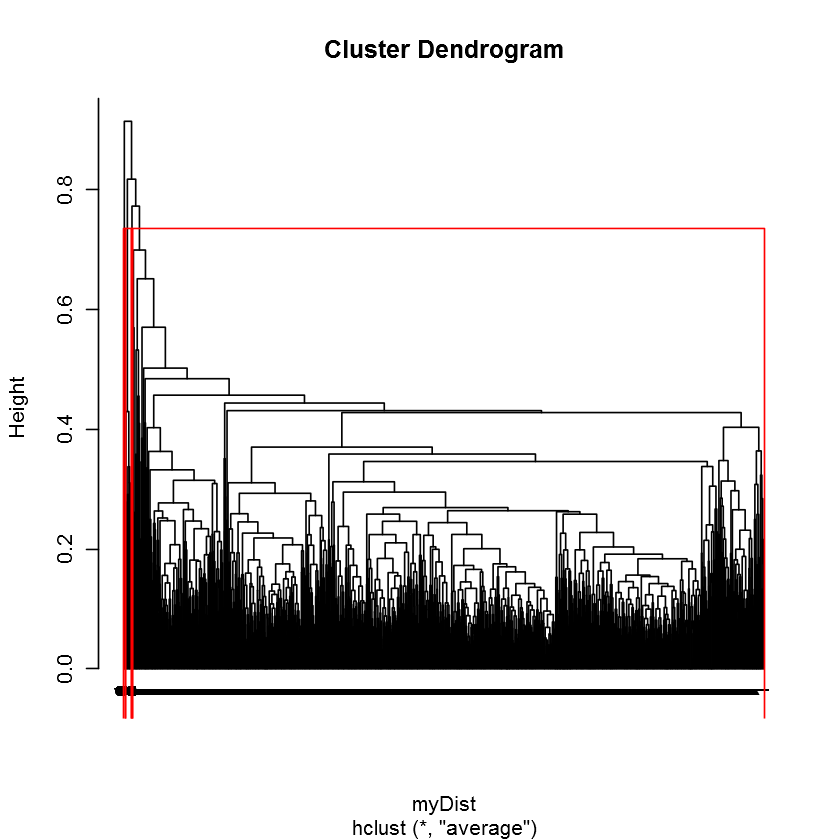

In [24]:
plot(hc, hang <- -1, labels=groups) 
rect.hclust(hc, k = 4, which = NULL, x = NULL, h = NULL, border
= 2, cluster = NULL)